In [181]:
# loading in all the essentials for data manipulation
import pandas as pd
import numpy as np
# load in the NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base formfrom nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams, WordNetLemmatizer
# We can use counter to count the objects from collections
from collections import Counter
# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from wordcloud import WordCloud
from PIL import Image

In [182]:
def clean_token(tokens, excludeList):
    new_tokens = [t.lower() for t in tokens]
    new_tokens = [t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in excludeList]
    
    return new_tokens

In [183]:
def word_frequency(sentence, excludeList):
    # joins all the sentences
    # sentence = "".join(sentence)
    # creates tokens, creates lower class, removes numbers and lemmatizes the words
    new_tokens = word_tokenize(sentence)
    new_tokens = clean_token(new_tokens, excludeList)
    # counts the words, pairs and trigrams
    counted = Counter(new_tokens)
    counted_2 = Counter(ngrams(new_tokens, 2))
    counted_3 = Counter(ngrams(new_tokens, 3))
    # creates 3 data frames and returns them
    word_freq = pd.DataFrame(counted.items(), columns=['word', 'frequency']).sort_values(
        by='frequency', ascending=False)
    word_pairs = pd.DataFrame(counted_2.items(), columns=['pairs', 'frequency']).sort_values(
        by='frequency', ascending=False)
    trigrams = pd.DataFrame(counted_3.items(), columns=['trigrams', 'frequency']).sort_values(
        by='frequency', ascending=False)
    return word_freq, word_pairs, trigrams

In [184]:
def readfile(filepath):
    data = ""
    with open(filepath) as f:
        csv_reader = csv.reader(f)
        header = next(csv_reader)
        for row in csv_reader:
            if len(row) > 0:
                data += row[0]
    return data


In [185]:
def barplot(file, excludeList):
    data = readfile(file)
    res = word_frequency(data, excludeList)
    # create subplot of the different data frames
    fig, axes = plt.subplots(3,1,figsize=(8,20))
    sns.barplot(ax=axes[0],x='frequency',y='word',data=res[0].head(30))
    sns.barplot(ax=axes[1],x='frequency',y='pairs',data=res[1].head(30))
    sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=res[2].head(30))

In [186]:
def wordcloud(file, excludeList, picpath):
    data = readfile(file)
    res = word_frequency(data, excludeList)
    worddict = {}
    mymask = np.array(Image.open(picpath))
    freq = res[0]
    for index, row in freq.head(50).iterrows():
        worddict[row[0]] = row[1]

    wc = WordCloud(background_color="white", max_words=1000, mask=mymask)
    wc.generate_from_frequencies(worddict)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")

In [187]:
file1 = "datasource/Issues-microsoft_vscode-GitHub.csv"
excludeList1 = ['v', 'file', 'code', 'open', 'vscode', 'line', 'work', 'tab', 'show', 'use', 'using', 'text',
                'folder', 'allow']

file2 = "datasource/Pull_requests-microsoft_vscode-GitHub.csv"
excludeList2 = ['file', 'vscode', 'code']

file3 = "datasource/Pull_requests-open-microsoft_vscode-GitHub.csv"
excludeList3 = ['vscode']

file4 = "datasource/vscode-StackOverflow.csv"
excludeList4 = ['vscode', 'visual', 'studio', 'vscodevscode']


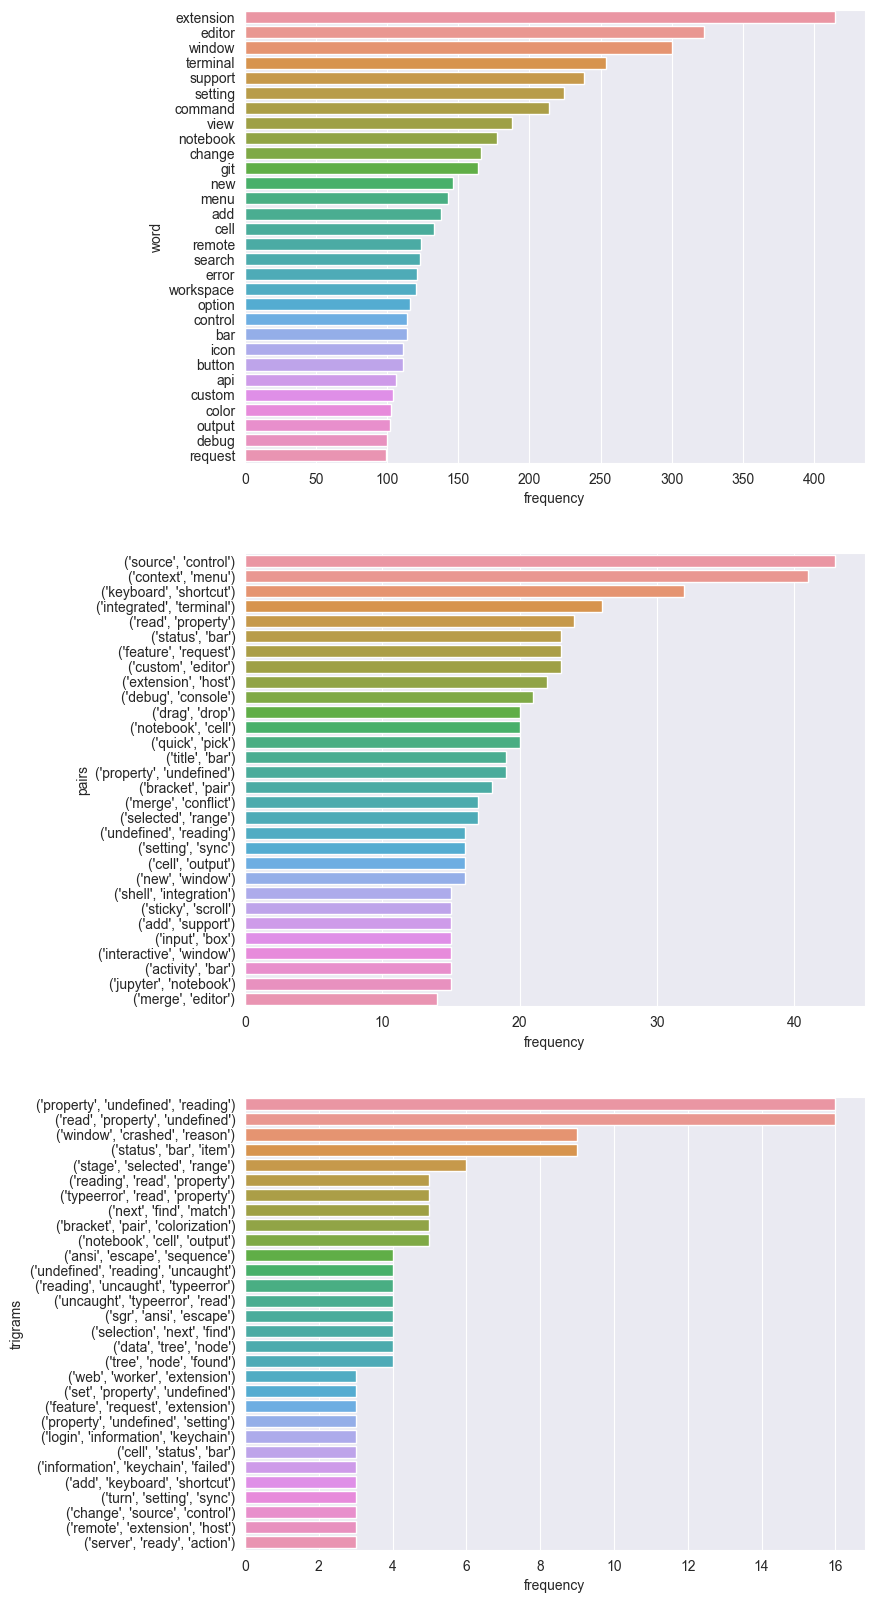

In [188]:
barplot(file1, excludeList1)

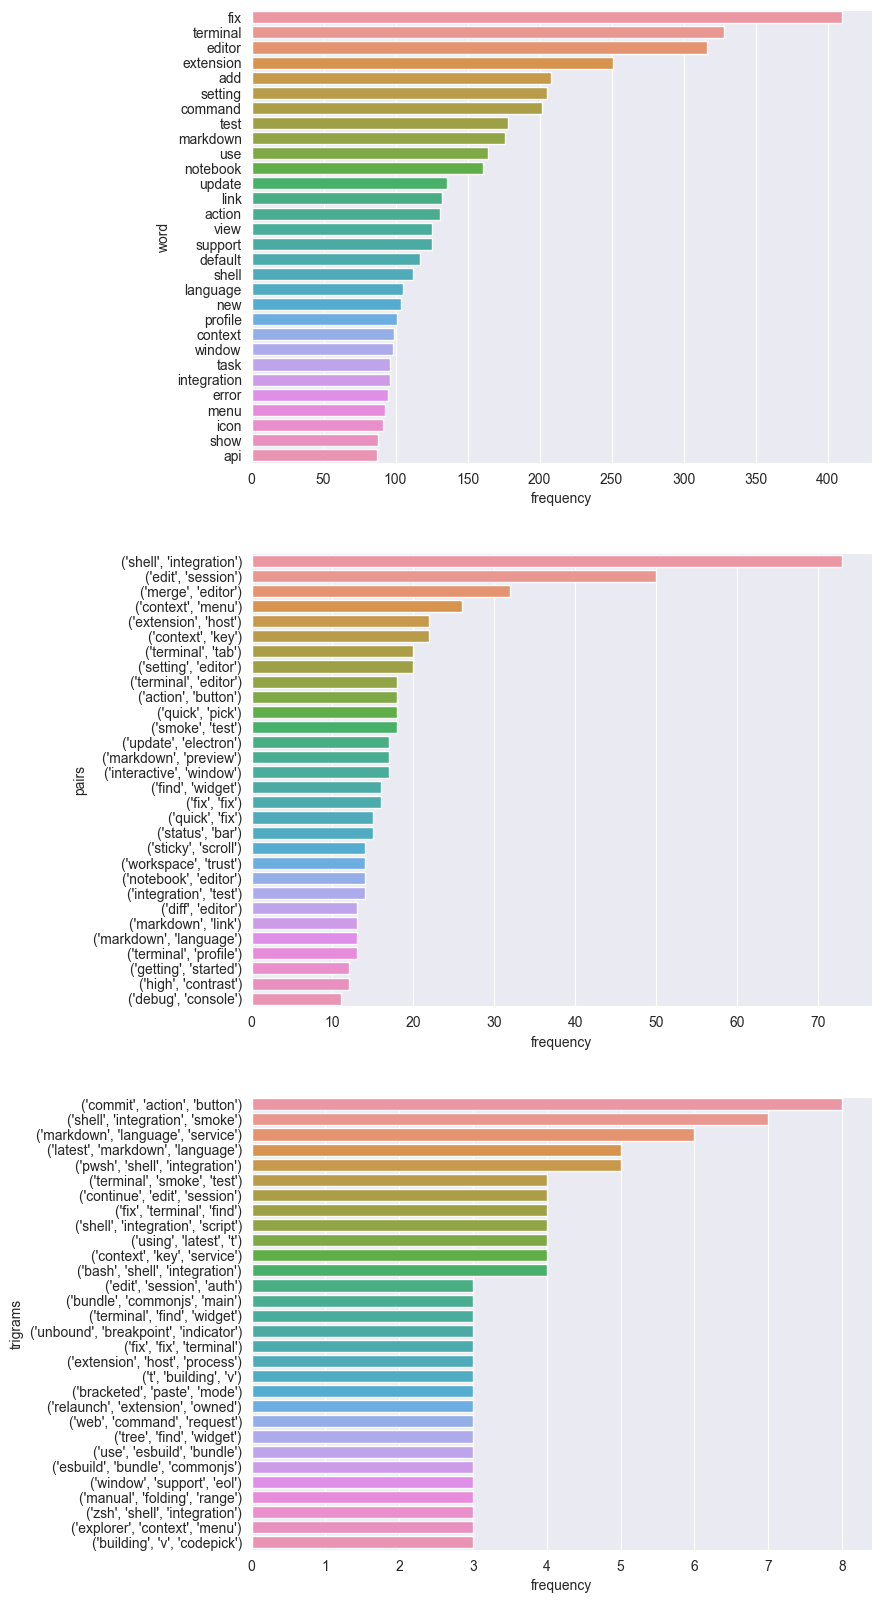

In [189]:
barplot(file2, excludeList2)

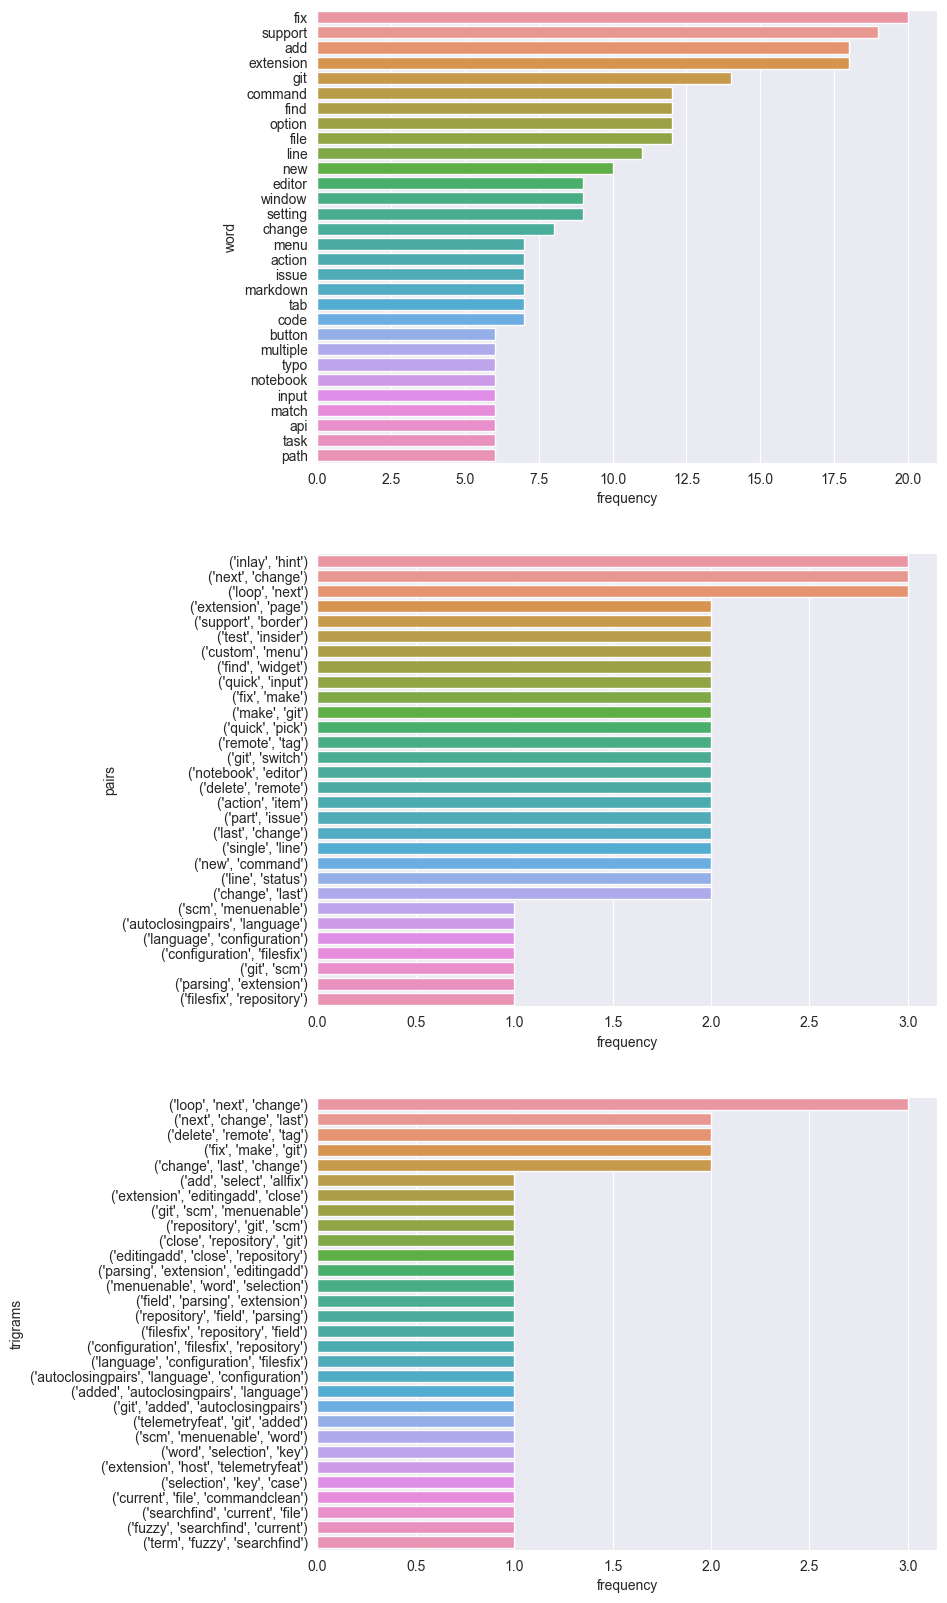

In [190]:
barplot(file3, excludeList3)

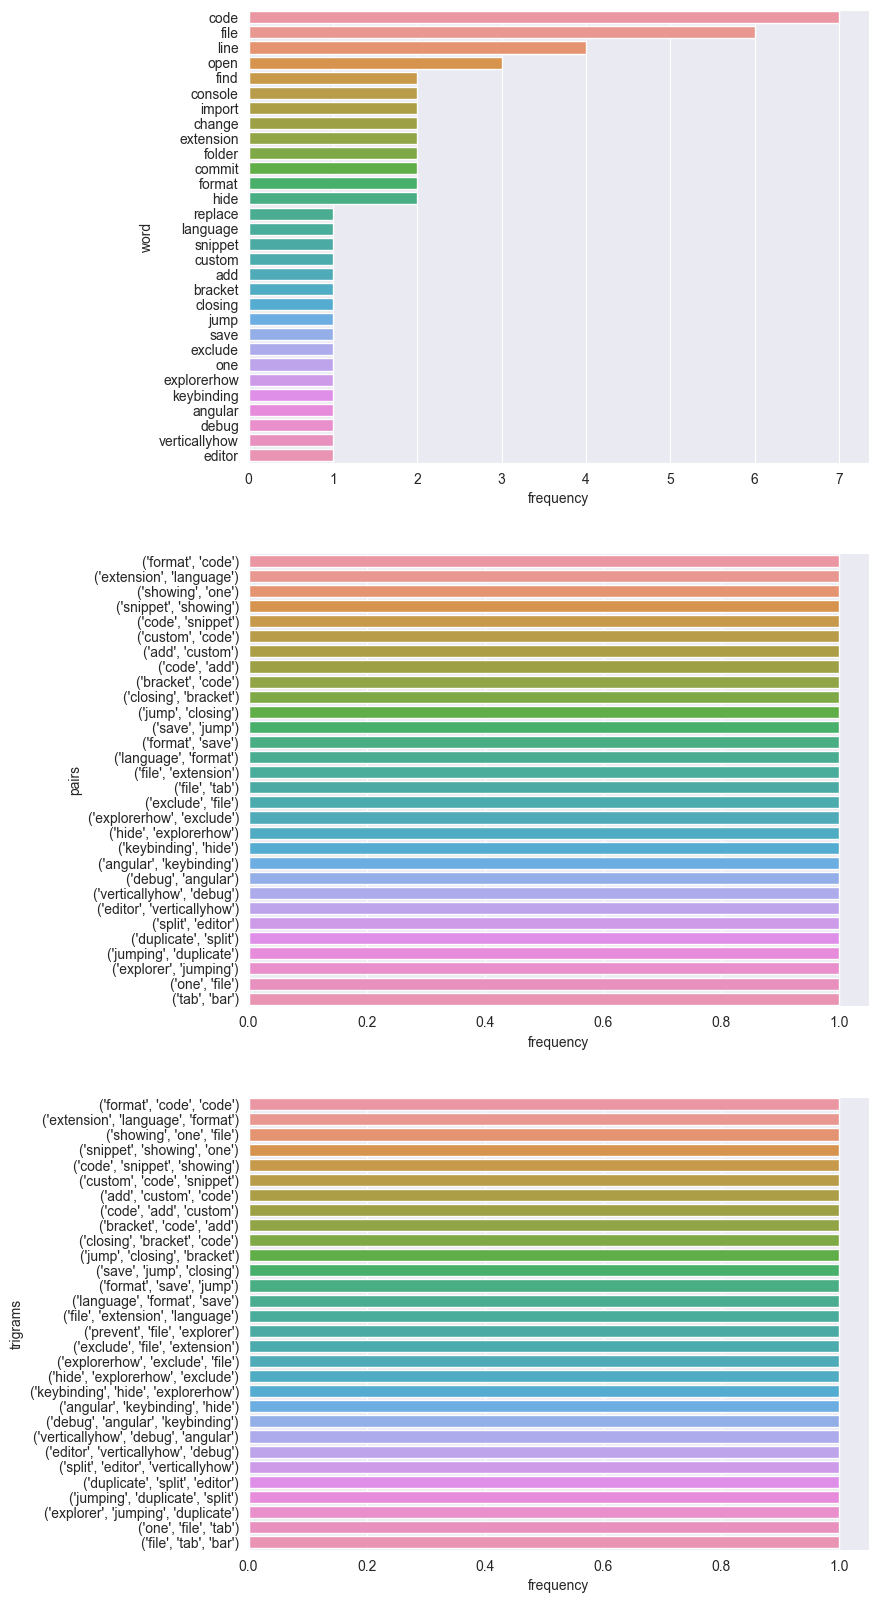

In [191]:
barplot(file4, excludeList4)

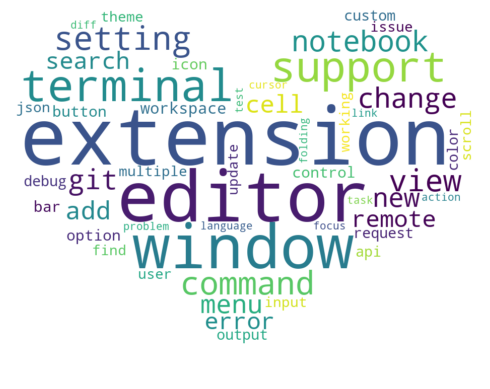

In [192]:
wordcloud(file1, excludeList1, "mask/cloud1.jpg")

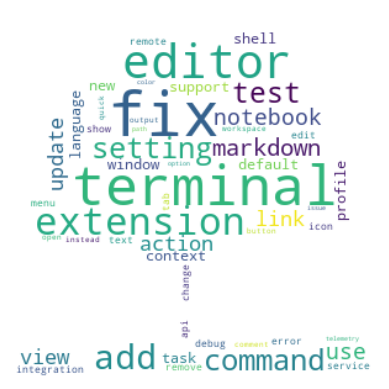

In [193]:
wordcloud(file2, excludeList2, "mask/cloud2.jpg")

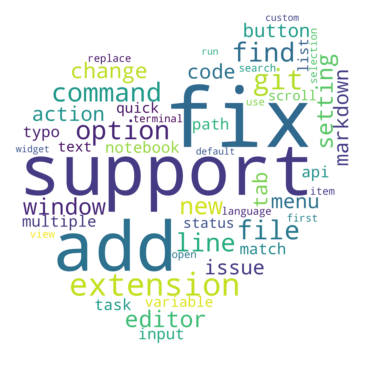

In [194]:
wordcloud(file3, excludeList3, "mask/cloud3.png")

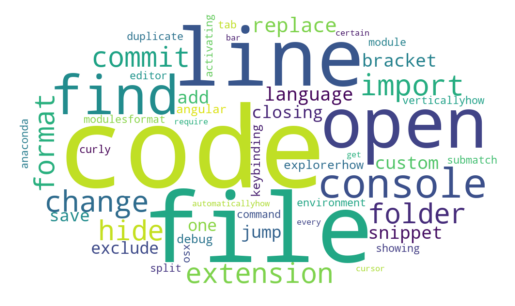

In [195]:
wordcloud(file4, excludeList4, "mask/cloud4.png")